In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Colormap 에서 1차 성분을 클릭으로 추출한 결과(수작업)

data = pd.read_csv('City_Mode.csv', sep = ',')

In [4]:
data.tail()

,sec,spd,Unnamed: 2
945,448150,470,NaN
946,452125,340,NaN
947,459650,390,NaN
948,465300,445,NaN
949,470000,445,NaN


In [5]:
data['spd']

0      405
1      410
2      480
3      535
4      535
      ... 
945    470
946    340
947    390
948    445
949    445
Name: spd, Length: 950, dtype: int64

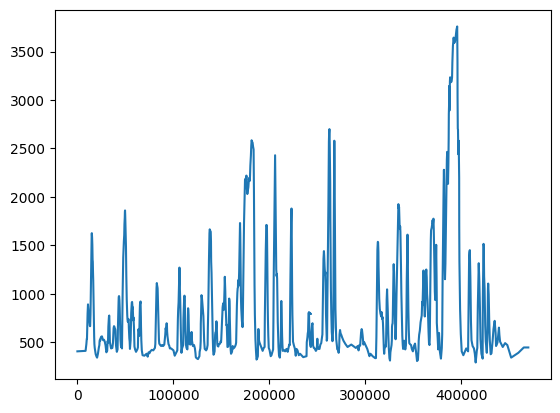

In [6]:
plt.plot(data.sec, data.spd)

In [7]:
data_city = pd.DataFrame(index=range(0, 469900), columns=['time', 'speed'])

In [8]:
data_city

,time,speed
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
469895,NaN,NaN
469896,NaN,NaN
469897,NaN,NaN
469898,NaN,NaN


In [9]:
for i in range(0, len(data_city)):
    data_city.time[i] = i+100

C:\Users\HO\AppData\Local\Temp\ipykernel_15220\4247835686.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_city.time[i] = i+100


In [10]:
data_city

,time,speed
0,100,NaN
1,101,NaN
2,102,NaN
3,103,NaN
4,104,NaN
...,...,...
469895,469995,NaN
469896,469996,NaN
469897,469997,NaN
469898,469998,NaN


In [11]:
for i in range(0, len(data_city)):
    for j in range(0, len(data)):
        if data_city.time[i] == data.sec[j]:
            data_city.speed[i] = data.spd[j]
            print("matched (i, j) =", i, j)
            break

C:\Users\HO\AppData\Local\Temp\ipykernel_15220\359286241.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_city.speed[i] = data.spd[j]


matched (i, j) = 0 0
matched (i, j) = 8525 1
matched (i, j) = 9350 2
matched (i, j) = 9800 3
matched (i, j) = 10000 4
matched (i, j) = 10175 5
matched (i, j) = 10350 6
matched (i, j) = 10625 7
matched (i, j) = 10800 8
matched (i, j) = 10950 9
matched (i, j) = 11050 10
matched (i, j) = 11275 11
matched (i, j) = 11600 12
matched (i, j) = 12125 13
matched (i, j) = 12650 14
matched (i, j) = 12925 15
matched (i, j) = 13125 16
matched (i, j) = 13300 17
matched (i, j) = 13650 18
matched (i, j) = 13925 19
matched (i, j) = 14125 20
matched (i, j) = 14550 21
matched (i, j) = 14750 22
matched (i, j) = 14875 23
matched (i, j) = 14950 24
matched (i, j) = 15075 25
matched (i, j) = 15325 26
matched (i, j) = 15575 27
matched (i, j) = 15850 28
matched (i, j) = 16050 29
matched (i, j) = 16150 30
matched (i, j) = 16250 31
matched (i, j) = 16500 32
matched (i, j) = 16750 33
matched (i, j) = 17100 34
matched (i, j) = 17475 35
matched (i, j) = 17725 36
matched (i, j) = 18075 37
matched (i, j) = 19075 38
mat

In [14]:
#data_city.to_excel("City_Mode_temp.xlsx")
data_city.to_csv("City_Mode_temp.csv")

In [17]:
data_city.tail()

,time,speed
469895,469995,NaN
469896,469996,NaN
469897,469997,NaN
469898,469998,NaN
469899,469999,NaN


In [ ]:
#### 앞에 확정된 i 값을 기억하여 -> 다음 루프에서는 그 뒤에 값만 검색하는 알고리즘으로 수정 -> 반복 속도 향상
# 처음부터 다시 시작할 필요가 없다.

# j가 950이 될 때까지 계속 실행
# 결측치 부분 확인 - 49만개 데이터 중 결측치는 아래 선형보간법으로 채우기

# data_city.time[100]

200

In [21]:
# 데이터프레임 복사

data_city_copy = data_city.copy()

In [22]:
data_city_copy

,time,speed
0,100,405
1,101,NaN
2,102,NaN
3,103,NaN
4,104,NaN
...,...,...
469894,469994,NaN
469895,469995,NaN
469896,469996,NaN
469897,469997,NaN


In [38]:
data_city.speed[465200:465110]

Series([], Name: speed, dtype: object)

In [24]:
len(data_city)

469898

In [ ]:
# 여러개의 결측치를 선형보간법으로 채우기

data_city['speed'] = data_city['speed'].interpolate(method = 'polynomial', order=2)

In [ ]:
import pandas as pd

data_city_temp = pd.read_csv('City_Mode_temp.csv', sep = ',')

In [35]:
data_city_temp.tail()

,Unnamed: 0,time,speed
469895,469895,469995,NaN
469896,469896,469996,NaN
469897,469897,469997,NaN
469898,469898,469998,NaN
469899,469899,469999,NaN


In [36]:
data_city_temp.speed[465200:465210]

465200    445.0
465201      NaN
465202      NaN
465203      NaN
465204      NaN
465205      NaN
465206      NaN
465207      NaN
465208      NaN
465209      NaN
Name: speed, dtype: float64

In [37]:
data_city_temp_final = data_city_temp.loc[0:465200, 'time': 'speed']
data_city_temp_final.tail()

,time,speed
465196,465296,NaN
465197,465297,NaN
465198,465298,NaN
465199,465299,NaN
465200,465300,445.0


In [38]:
data_city_temp_final.head()

,time,speed
0,100,405.0
1,101,NaN
2,102,NaN
3,103,NaN
4,104,NaN


In [ ]:
data_city_temp_final['speed'] = data_city_temp_final['speed'].interpolate(method = 'polynomial', order=1)

# order를 증가시키는 경우 커브 형상의 변화는 있는가? (241124) : 
# 시작 부분에서 RPM 변화 있음 (2->3)
# 1로 설정하는 경우가 더 합리적임 (241124)

In [40]:
data_city_temp_final.head()

,time,speed
0,100,405.000000
1,101,405.000587
2,102,405.001173
3,103,405.001760
4,104,405.002346


In [41]:
# 소수점 둘째자리까지 정리 (241122)

column = 'speed'
where = 2

data_city_temp_final[column]= round(data_city_temp_final[column], where)

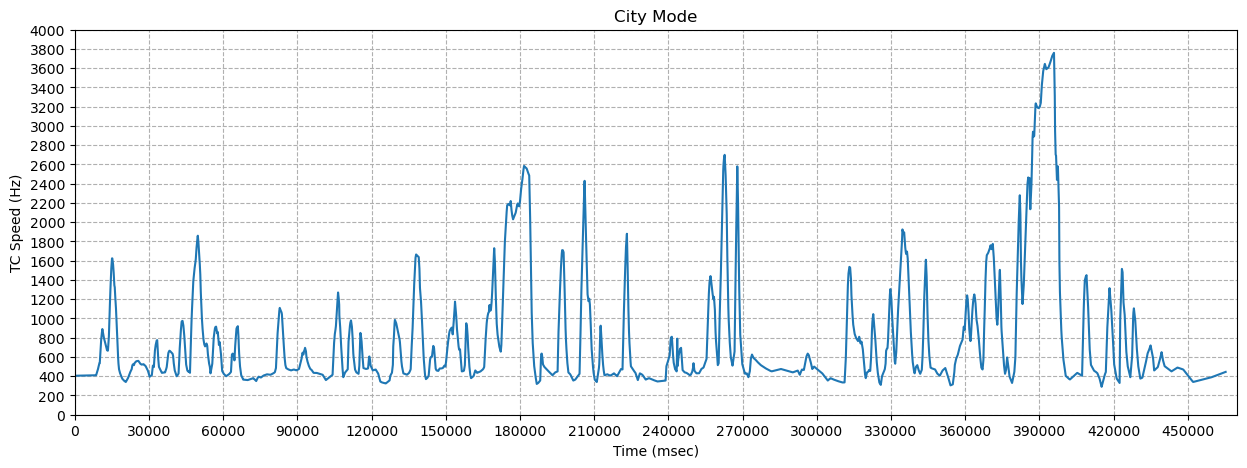

In [42]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

plt.yticks(np.arange(0, 4001, 200))
plt.xticks(np.arange(0, 470001, 30000))

plt.plot(data_city_temp_final.time, data_city_temp_final.speed)

plt.title('City Mode')
plt.xlabel('Time (msec)')
plt.ylabel('TC Speed (Hz)')
plt.xlim([0, 470000])      # X축의 범위: [xmin, xmax]
plt.ylim([0, 4000])     # Y축의 범위: [ymin, ymax]
plt.grid(True, linestyle='--')
plt.show()

In [62]:
data_city_temp_final.to_csv("City_Mode_final.csv")